In [202]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("Jan_to_Dec.csv",parse_dates=["date"],dayfirst=True)
df.info
df.shape

(35060, 3)

In [203]:
from datetime import datetime,date,time

In [204]:
df.dropna()

,date,time,mcp
0,2021-01-01,00:00,2301.03
1,2021-01-01,00:15,2300.12
2,2021-01-01,00:30,2298.10
3,2021-01-01,00:45,2243.24
4,2021-01-01,01:00,2131.71
...,...,...,...
35055,2021-12-31,23:15,1999.99
35056,2021-12-31,23:30,1999.85
35057,2021-12-31,23:45,1999.58
35058,2021-12-31,23:45,1999.58


In [205]:
for i in range(0,df['time'].size):
    df.loc[i,'time']=datetime.strptime(df.loc[i,'time'], '%H:%M').time()

In [206]:
for i in range (0,df['time'].size) :
    df.loc[i,'days']=pd.Timestamp.combine((df.loc[i,'date']),(df.loc[i,'time']))

In [207]:
df

,date,time,mcp,days
0,2021-01-01,00:00:00,2301.03,2021-01-01 00:00:00
1,2021-01-01,00:15:00,2300.12,2021-01-01 00:15:00
2,2021-01-01,00:30:00,2298.10,2021-01-01 00:30:00
3,2021-01-01,00:45:00,2243.24,2021-01-01 00:45:00
4,2021-01-01,01:00:00,2131.71,2021-01-01 01:00:00
...,...,...,...,...
35055,2021-12-31,23:15:00,1999.99,2021-12-31 23:15:00
35056,2021-12-31,23:30:00,1999.85,2021-12-31 23:30:00
35057,2021-12-31,23:45:00,1999.58,2021-12-31 23:45:00
35058,2021-12-31,23:45:00,1999.58,2021-12-31 23:45:00


In [208]:
df=df.set_index('days')

In [209]:
df

,date,time,mcp
days,,,
2021-01-01 00:00:00,2021-01-01,00:00:00,2301.03
2021-01-01 00:15:00,2021-01-01,00:15:00,2300.12
2021-01-01 00:30:00,2021-01-01,00:30:00,2298.10
2021-01-01 00:45:00,2021-01-01,00:45:00,2243.24
2021-01-01 01:00:00,2021-01-01,01:00:00,2131.71
...,...,...,...
2021-12-31 23:15:00,2021-12-31,23:15:00,1999.99
2021-12-31 23:30:00,2021-12-31,23:30:00,1999.85
2021-12-31 23:45:00,2021-12-31,23:45:00,1999.58


In [210]:
df=df.drop(['time'],axis=1)

In [211]:
df

,date,mcp
days,,
2021-01-01 00:00:00,2021-01-01,2301.03
2021-01-01 00:15:00,2021-01-01,2300.12
2021-01-01 00:30:00,2021-01-01,2298.10
2021-01-01 00:45:00,2021-01-01,2243.24
2021-01-01 01:00:00,2021-01-01,2131.71
...,...,...
2021-12-31 23:15:00,2021-12-31,1999.99
2021-12-31 23:30:00,2021-12-31,1999.85
2021-12-31 23:45:00,2021-12-31,1999.58


In [213]:
df=df.resample('1H').mean()

C:\Temp\ipykernel_3448\3977504172.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df.resample('1H').mean()


In [214]:
df

,mcp
days,
2021-01-01 00:00:00,2285.6225
2021-01-01 01:00:00,2097.2125
2021-01-01 02:00:00,2008.1925
2021-01-01 03:00:00,2008.3225
2021-01-01 04:00:00,2038.7250
...,...
2021-12-31 19:00:00,4325.2825
2021-12-31 20:00:00,3707.3575
2021-12-31 21:00:00,3012.5650


<AxesSubplot:xlabel='days'>

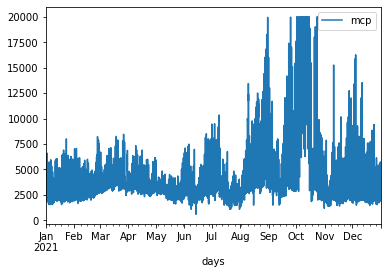

In [215]:
df.plot()

In [216]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [217]:
test_result=adfuller(df['mcp'])

In [218]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(mcp):
    result=adfuller(mcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [219]:
adfuller_test(df['mcp'])

ADF Test Statistic : -4.0098651613789675
p-value : 0.001359726254697418
#Lags Used : 31
Number of Observations Used : 8728
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [187]:
# df['Seasonal First Difference']=df['mcp']-df['mcp'].shift(50)

In [220]:
## Again test dickey fuller test
# adfuller_test(df['Seasonal First Difference'].dropna())

In [221]:
# df['Seasonal First Difference'].plot()

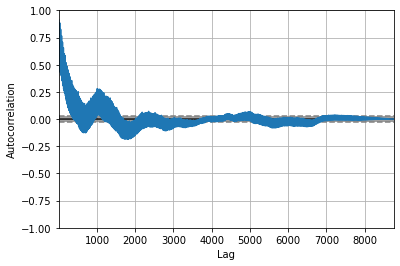

In [222]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['mcp'])
plt.show()

In [223]:
import statsmodels.api as sm

In [224]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\arpan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


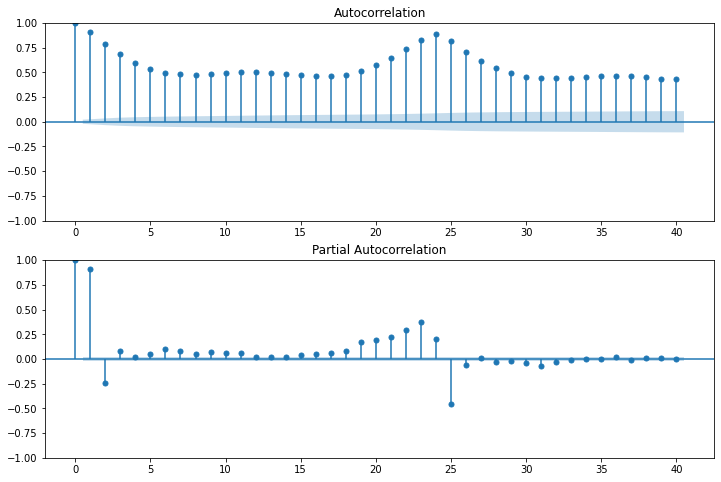

In [242]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['mcp'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['mcp'].dropna(),lags=40,ax=ax2)

In [243]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(df['mcp'], trace=True,
# suppress_warnings=True)

In [394]:
model=sm.tsa.statespace.SARIMAX(df['mcp'],order=(24, 1, 4))
results=model.fit()

C:\Users\arpan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\arpan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [395]:
# from statsmodels.tsa.arima.model import ARIMA
# model=ARIMA(df['mcp'],order=(24,0,1))
# result=model.fit()
# result.summary()

In [396]:
print(df.shape)
train=df.iloc[:-24]
test=df.iloc[-24:]
print(train.shape,test.shape)

(8760, 1)
(8736, 1) (24, 1)


In [397]:
start=len(train)
end=len(train)+len(test)-1


# df['forecast']=results.predict(start,end,dynamic=True)
# df[['mcp','forecast']].plot(figsize=(12,8))

pred=results.predict(start,end,dynamic=True)
test_vs_pred=pd.concat([test['mcp'],pred],axis=1)

<AxesSubplot:xlabel='days'>

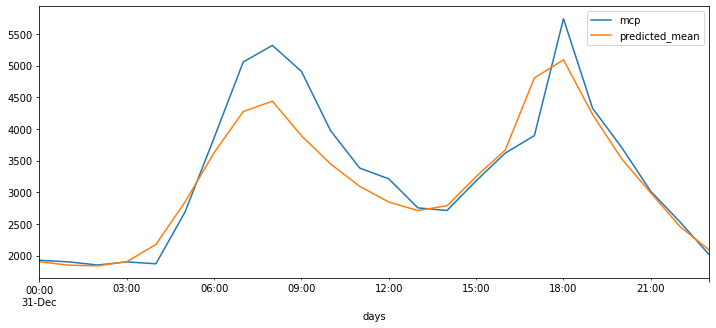

In [398]:
test_vs_pred.plot(figsize=(12,5))

In [399]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['mcp'],pred))
print(rmse)

428.7780158892984


In [400]:
from sklearn.metrics import mean_absolute_percentage_error
error=mean_absolute_percentage_error(test['mcp'],pred)

In [401]:
print(error)

0.07330671177363438


In [328]:
# df['forecast']=results.predict(start=90,end=200,dynamic=True)
# df[['mcp','forecast']].plot(figsize=(12,8))

In [329]:
df

,mcp
days,
2021-01-01 00:00:00,2285.6225
2021-01-01 01:00:00,2097.2125
2021-01-01 02:00:00,2008.1925
2021-01-01 03:00:00,2008.3225
2021-01-01 04:00:00,2038.7250
...,...
2021-12-31 19:00:00,4325.2825
2021-12-31 20:00:00,3707.3575
2021-12-31 21:00:00,3012.5650


In [330]:
df.head()

,mcp
days,
2021-01-01 00:00:00,2285.6225
2021-01-01 01:00:00,2097.2125
2021-01-01 02:00:00,2008.1925
2021-01-01 03:00:00,2008.3225
2021-01-01 04:00:00,2038.7250


In [331]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(hours=x)for x in range(0,30)]

In [332]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [333]:
future_datest_df.head()

,mcp
2022-01-01 00:00:00,NaN
2022-01-01 01:00:00,NaN
2022-01-01 02:00:00,NaN
2022-01-01 03:00:00,NaN
2022-01-01 04:00:00,NaN


In [379]:
future_datest_df['forecast'] = results.predict(start = len(train)+len(test)-1, end = 8807, dynamic= True)  
# future_df[['forecast']].plot(figsize=(12, 8)) 

In [380]:
future_datest_df

,mcp,forecast
2022-01-01 00:00:00,NaN,2038.493718
2022-01-01 01:00:00,NaN,2045.099076
2022-01-01 02:00:00,NaN,2027.129375
2022-01-01 03:00:00,NaN,2122.802967
2022-01-01 04:00:00,NaN,2254.370953
2022-01-01 05:00:00,NaN,2984.653799
2022-01-01 06:00:00,NaN,3949.309949
2022-01-01 07:00:00,NaN,4822.654669
2022-01-01 08:00:00,NaN,5017.990852
2022-01-01 09:00:00,NaN,4612.713262


<AxesSubplot:>

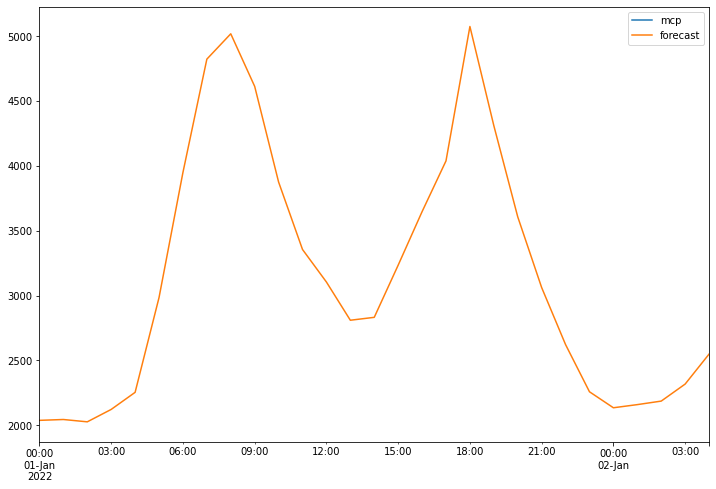

In [381]:
future_datest_df.plot(figsize=(12, 8)) 

In [382]:
future_df=pd.concat([test,future_datest_df])

<AxesSubplot:>

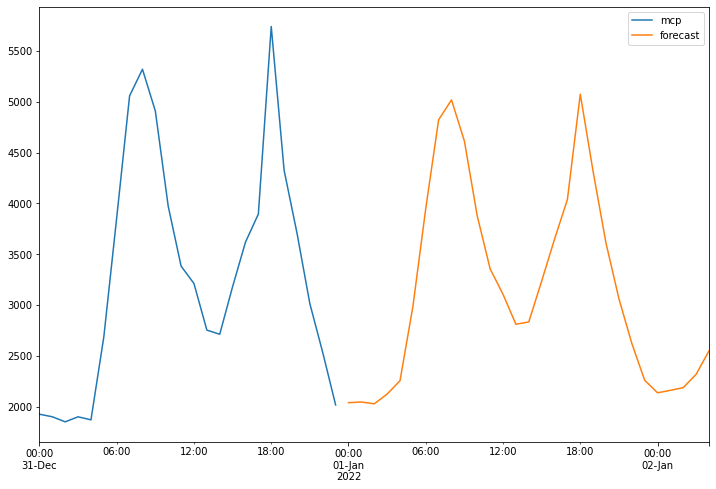

In [383]:
future_df.plot(figsize=(12, 8))

In [384]:
test.tail()

,mcp
days,
2021-12-31 19:00:00,4325.2825
2021-12-31 20:00:00,3707.3575
2021-12-31 21:00:00,3012.5650
2021-12-31 22:00:00,2531.9625
2021-12-31 23:00:00,2016.4550


In [385]:
future_df.head()

,mcp,forecast
2021-12-31 00:00:00,1924.7300,NaN
2021-12-31 01:00:00,1899.7175,NaN
2021-12-31 02:00:00,1849.8375,NaN
2021-12-31 03:00:00,1899.4025,NaN
2021-12-31 04:00:00,1869.3150,NaN
